# Qui êtes-vous ?
<div class="alert alert-block alert-info">
Écrire ci-dessous votre nom, prénom et numéro étudiant :
</div>

In [4]:
# CHAHINE Marilyn 21517286
# SANGINETO Marina 21514607

# TME 03 - Opérateurs d'agrégation et LIME

In [5]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=7ea3acb8c6e001514b58bb3f994e28158bd5511bbc38fa238b6f7ee0a3860dd1
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from scipy.special import softmax
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score
import pandas as pd
from lime.lime_tabular import LimeTabularExplainer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
from scipy.sparse import vstack
from sklearn.linear_model import Ridge

## A - Opérateurs d'agrégation

<div class="alert alert-block alert-warning">
L'objet de la 1ère partie de TME est de tracer les lignes de niveaux des opérateurs d'agrégation vus en cours
</div>

<div class="alert alert-block alert-info">
    Ecrire une fonction qui calcule la moyenne pondérée d'un vecteur <code>x</code> en fonction d'un vecteur <code>poids</code>
</div>

In [7]:
def compute_weighted_avg(x, w):
    assert ( (sum(w) == 1.0) or (sum(w) == 1) ), "sum of the weights is not equal to 1"
    assert len(w) == len(x), "weights and x lists are not of equal size"
    return sum(w*x)

In [9]:
w = np.random.uniform(0, 1, size=5)
w = softmax(w)
x = np.random.uniform(0, 20, size=5)

wgd_avg = compute_weighted_avg(x,w)

print(wgd_avg)

10.177853947294578


<div class="alert alert-block alert-info">
    Ecrire une fonction qui trace les lignes de niveaux d'un opérateur, en l'appliquant à des vecteurs de taille 2. <br>  
    NB les fonctions meshgrid et contour peuvent être utiles
</div>

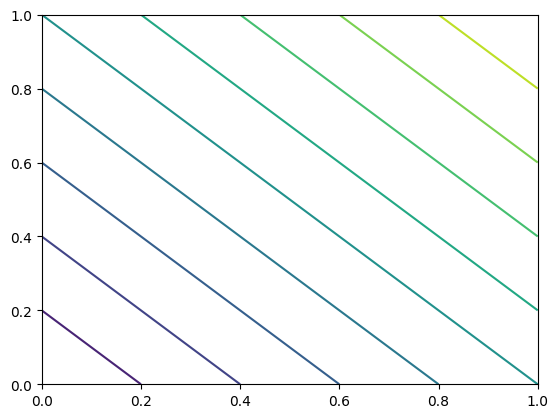

In [10]:
def draw_level_lines_sum():

    # w1: weight of x1 in the weighted average
    # w2: weight of x2 in the weighted average
    # where x1 <= x2

    x = np.linspace(0, 1, num=50)
    y = np.linspace(0, 1, num=50)
    X, Y = np.meshgrid(x, y)

    Z = np.zeros((50,50))

    for i in range(50):
        for j in range(50):
            Z[i][j] = X[i][j] + Y[i][j]

    plt.contour(X, Y, Z, 10)
    title = "Level lines for the sum operator"
    plt.show()

draw_level_lines_sum()

<div class="alert alert-block alert-info">
    Ecrire une fonction qui calcule un OWA d'un vecteur <code>x</code> en fonction d'un vecteur <code>poids</code>
</div>

In [11]:
def compute_OWA(x, w):
    assert ( (sum(w) == 1.0) or (sum(w) == 1) ), "sum of the weights is not equal to 1"
    assert len(w) == len(x), "weights and x lists are not of equal size"
    return sum(w*np.sort(x))

<div class="alert alert-block alert-info">
    Visualiser les lignes de niveaux de différentes configurations des moyennes pondérées et des OWA pour différents vecteurs de poids.    
</div>

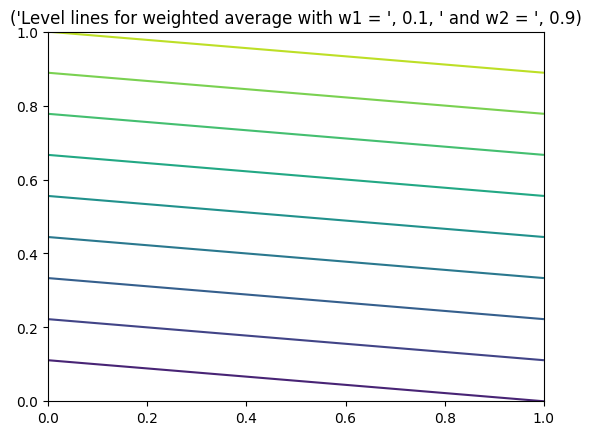

In [12]:
def draw_level_lines_wgd_avg(w1, w2):

    # w1: weight of x1 in the weighted average
    # w2: weight of x2 in the weighted average
    # where x1 <= x2

    x = np.linspace(0, 1, num=50)
    y = np.linspace(0, 1, num=50)
    X, Y = np.meshgrid(x, y)

    Z = np.zeros((50,50))

    for i in range(50):
        for j in range(50):
            Z[i][j] = compute_weighted_avg([X[i][j], Y[i][j]], np.array([w1, w2]))

    plt.contour(X, Y, Z, 10)
    title = "Level lines for weighted average with w1 = ", w1, " and w2 = ", w2
    plt.title(title)
    plt.show()

draw_level_lines_wgd_avg(0.1, 0.9)

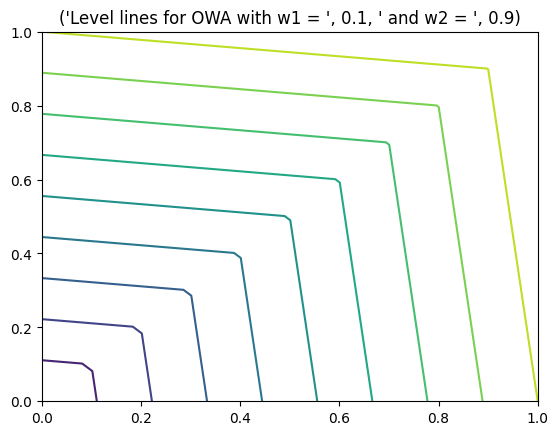

In [13]:
def draw_level_lines_OWA(w1, w2):

    # w1: weight of x1 in the weighted average
    # w2: weight of x2 in the weighted average
    # where x1 <= x2

    x = np.linspace(0, 1, num=50)
    y = np.linspace(0, 1, num=50)
    X, Y = np.meshgrid(x, y)

    Z = np.zeros((50,50))

    for i in range(50):
        for j in range(50):
            Z[i][j] = compute_OWA([X[i][j], Y[i][j]], np.array([w1, w2]))

    plt.contour(X, Y, Z, 10)
    title = "Level lines for OWA with w1 = ", w1, " and w2 = ", w2
    plt.title(title)
    plt.show()

draw_level_lines_OWA(0.1, 0.9)

<div class="alert alert-block alert-info">
    Visualiser aussi les lignes de niveaux des opérateurs conjonctifs et disjonctifs vus en cours, ainsi que l'opérateur à comportement variable (intégrale de Gödel), après avoir défini les fonctions permettant de calculer ces opérateurs.
</div>

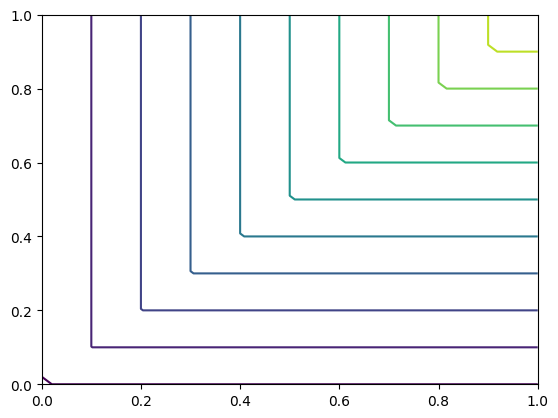

In [14]:
def draw_level_lines_min():

    # w1: weight of x1 in the weighted average
    # w2: weight of x2 in the weighted average
    # where x1 <= x2

    x = np.linspace(0, 1, num=50)
    y = np.linspace(0, 1, num=50)
    X, Y = np.meshgrid(x, y)

    Z = np.zeros((50,50))

    for i in range(50):
        for j in range(50):
            Z[i][j] = min(X[i][j], Y[i][j])

    plt.contour(X, Y, Z, 10)
    title = "Level lines for the min operator"
    plt.show()

draw_level_lines_min()

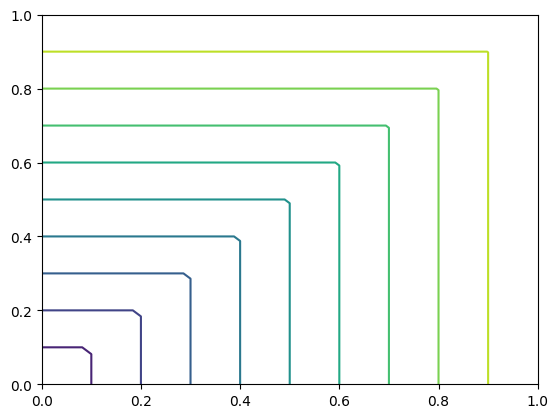

In [15]:
def draw_level_lines_max():

    # w1: weight of x1 in the weighted average
    # w2: weight of x2 in the weighted average
    # where x1 <= x2

    x = np.linspace(0, 1, num=50)
    y = np.linspace(0, 1, num=50)
    X, Y = np.meshgrid(x, y)

    Z = np.zeros((50,50))

    for i in range(50):
        for j in range(50):
            Z[i][j] = max(X[i][j], Y[i][j])

    plt.contour(X, Y, Z, 10)
    title = "Level lines for the max operator"
    plt.show()

draw_level_lines_max()

<div class="alert alert-block alert-info">
    Ecrire une fonction qui calcule l'intégrale de Choquet d'un vecteur <code>x</code> en fonction d'une capacité <code>mu</code>.<br>
    La fonction ne doit pas imposer de restriction au nombre de composantes de <code>x</code>, sa documentation doit expliciter la représentation choisie pour <code>mu</code>, la fonction doit inclure une vérification que <code>mu</code> satisfait les propriétés d'une capacité.
    
</div>

In [16]:
# modify this function in order to set the values of mu

def generate_mu_3D():

    mu = {}

    mu[frozenset()] = 0
    mu[frozenset({})] = 0

    mu[frozenset({1})] = 1
    mu[frozenset({2})] = 0.5
    mu[frozenset({3})] = 0.25

    mu[frozenset({1,2})] = 1
    mu[frozenset({1,3})] = 1
    mu[frozenset({2,3})] = 0.5

    mu[frozenset({1,2,3})] = 1


    """
    # verifying mu validity

    temp = np.linspace(1, nx, num=nx)

    for i in range(nx+1):
        lists = itertools.permutations(temp, i)
        for l in lists:
            l = l.astype(int)
            error = "The set ", str(l), " is not associated to a mu value"
            assert frozenset(l) not in mu, error

    # verifying all orders have a sum of weights equal to 1
    """

    return mu

In [17]:
def choquet(x, mu):
    sig = np.argsort(x)[::-1]
    sig = sig + 1
    x_ordered = np.sort(x)[::-1]

    result = 0

    for i in range(0,len(x)):
        selectedi = sig[0:i]
        selectediplus1 = sig[0:(i+1)]
        selectedi = frozenset(selectedi)
        selectediplus1 = frozenset(selectediplus1)
        wi = mu[selectediplus1] - mu[selectedi]

        result = result + wi*x_ordered[i]

    return result

In [18]:
x = (8, 15, 20)
mu = generate_mu_3D()
print(mu)
choquet_int = choquet(x, mu)
print(choquet_int)

{frozenset(): 0, frozenset({1}): 1, frozenset({2}): 0.5, frozenset({3}): 0.25, frozenset({1, 2}): 1, frozenset({1, 3}): 1, frozenset({2, 3}): 0.5, frozenset({1, 2, 3}): 1}
12.75


In [19]:
# modify this function in order to set the values of mu

def generate_mu_2D():

    mu = {}

    mu[frozenset()] = 0

    mu[frozenset({1})] = 0.5
    mu[frozenset({2})] = 0.9

    mu[frozenset({1,2})] = 1


    """
    # verifying mu validity

    temp = np.linspace(1, nx, num=nx)

    for i in range(nx+1):
        lists = itertools.permutations(temp, i)
        for l in lists:
            l = l.astype(int)
            error = "The set ", str(l), " is not associated to a mu value"
            assert frozenset(l) not in mu, error

    # verifying all orders have a sum of weights equal to 1
    """

    return mu

<div class="alert alert-block alert-info">
    Visualiser les lignes de niveaux de différentes intégrales de Choquet, pour différentes valeurs des paramètres.
</div>

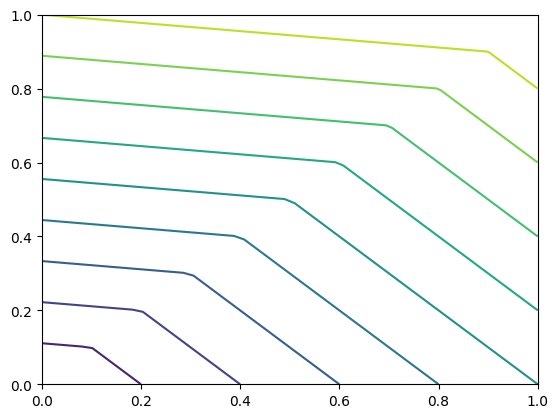

In [20]:
def draw_level_lines_choquet(mu):

    # mu

    x = np.linspace(0, 1, num=50)
    y = np.linspace(0, 1, num=50)
    X, Y = np.meshgrid(x, y)

    Z = np.zeros((50,50))

    for i in range(50):
        for j in range(50):
            Z[i][j] = choquet((X[i][j], Y[i][j]), mu)

    plt.contour(X, Y, Z, 10)
    title = "Level lines for the max operator"
    plt.show()

mu = generate_mu_2D()
draw_level_lines_choquet(mu)

<div class="alert alert-block alert-info">
    Commenter les résultats obtenus.
</div>

<div>
</div>

**Commentaire :**
<br>On peut voir qu'on obtient deux types de lignes de niveaux dépendamment de si X>Y ou Y>X.<br>Cela est dû au fait que les poids d'une intégrale de choquet à deux dimensions n'a que deux combinaisons de poids possibles et celle séléctionée ne dépend que de si sigma(2)={1} ou sigma(2)={2}, et donc de X>Y ou Y>X. Ce qui est aussi valide pour le comportement des lignes de niveaux pour l'opérateur OWA.

## B - LIME

<div class="alert alert-block alert-warning">
L'objet de cette 2ème partie de TME est de tester l'algorithme LIME sur une tâche de classification assez simple.
</div>

## 1 - Préparation du dataset


<div class="alert alert-block alert-warning">
    Nous allons utiliser les datasets <code>half-moons</code>, que vous savez manipuler, pour permettre la visualisation des résultats et <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)">UCI ML Breast Cancer Wisconsin (Diagnostic)</a> qui comporte plus d'attributs.
</div>

<div class="alert alert-block alert-info">
    Tout d'abord, exécuter le bloc ci-dessous pour importer la bibliothèque <code>datasets</code> de <code>sklearn</code>.
</div>

In [21]:
from sklearn import datasets

<div class="alert alert-block alert-info">
    Exécuter le bloc suivant pour charger les données <code>breast_cancer</code>.
 </div>

In [22]:
breast_cancer = datasets.load_breast_cancer()

<div class = "alert alert-block alert-info">
    Q1.1 - Visualiser le contenu de la variable <code>breast_cancer</code>.
</div>

In [23]:
breast_cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

<div class = "alert alert-block alert-info">
    Q1.2 - Définir les variables <code>X_train, X_test, y_train, y_test</code> avec <code>train_test_split</code> où vous utiliserez 25% des données pour le test.
</div>

In [24]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer['data'], breast_cancer['target'], test_size=0.25, random_state=42)

<div class = "alert alert-block alert-info">
    Q1.3 - Définir la variable <code>feature_names</code> contenant la liste des caractéristiques dans ce dataset ainsi que les noms de classes dans la variable <code>target_names</code>.
</div>

In [25]:
feature_names = breast_cancer.feature_names
target_names = breast_cancer.target_names
print(feature_names)
print(target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


## 2 - Apprentissage d'un modèle linéaire

<div class="alert alert-block alert-warning">
Nous allons apprendre la tâche de classification en utilisant un modèle de régression logistique.
</div>

<div class = "alert alert-block alert-info">
    Q2.1 - Apprendre un modèle <code>logreg</code> de régression logistique sur les données.
</div>

In [26]:
logreg = LogisticRegression(random_state=42, max_iter=10000).fit(X_train, y_train)

<div class = "alert alert-block alert-info">
    Q2.2 - Dans <code>y_pred</code>, calculer les prédictions sur les données de test.
</div>

In [27]:
y_pred = logreg.predict(X_test)

<div class = "alert alert-block alert-info">
    Q2.3 - Avec <code>confusion_matrix</code>, donner la matrice de confusion sur les données de test.
</div>

In [28]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[51  3]
 [ 2 87]]


<div class = "alert alert-block alert-info">
    Q2.3 - Avec <code>f1_score</code>, calculer le score f1.
</div>

In [29]:
f1 = f1_score(y_test, y_pred)
print(f1)

0.9720670391061452


<div class = "alert alert-block alert-info">
    Q2.4 - En utilisant les labels des caractéristiques du dataset, dessiner un diagramme en barre de l'importance de chaque caractéristique apprise par la régression logistique.
</div>

<Axes: >

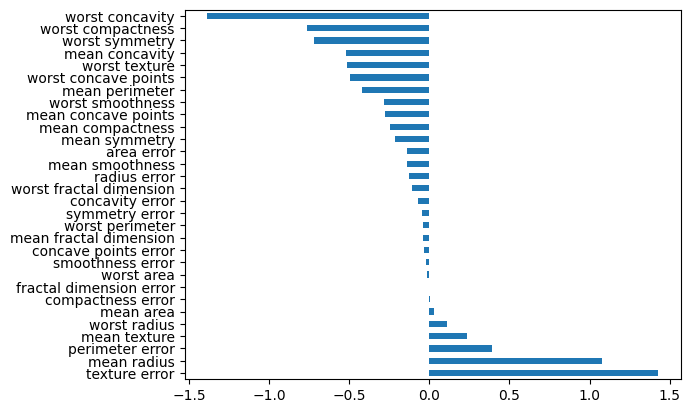

In [30]:
coefs = logreg.coef_[0]
pd.Series(coefs, index=feature_names).nlargest(coefs.size).plot(kind='barh')

<div class = "alert alert-block alert-info">
    Q2.5 - De la même manière, donner les importances des valeurs d'attributs du premier exemple de la base de test.
</div>

<Axes: >

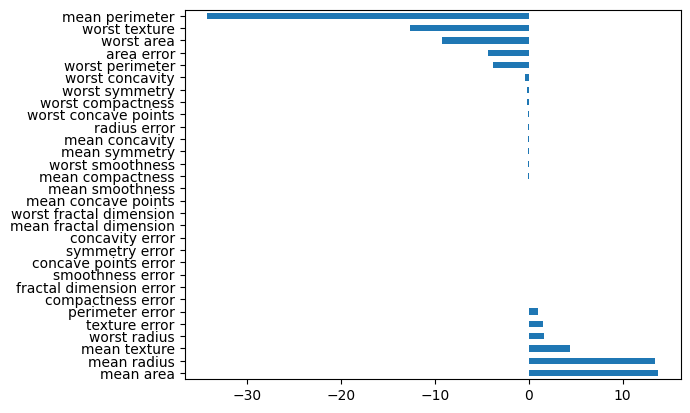

In [31]:
coefs = logreg.coef_[0]
coefs_test1 = coefs*X_test[0]
pd.Series(coefs_test1, index=feature_names).nlargest(coefs_test1.size).plot(kind='barh')

## 3 - Explication avec LIME

<div class="alert alert-block alert-warning">
Nous allons étudier une explication donnée par LIME.
</div>

<div class = "alert alert-block alert-info">
    Q3.1 - Exécuter le bloc ci-dessous pour obtenir une explication sur le premier exemple de la base de test. Commentez.
</div>

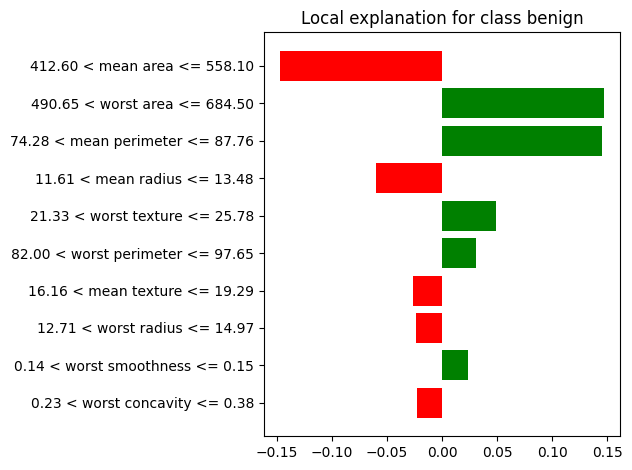

In [32]:
explainer = LimeTabularExplainer(X_test,
    feature_names=feature_names,
    class_names=target_names,
    categorical_features=[],
    mode='classification')

exp0 = explainer.explain_instance(X_test[0], logreg.predict_proba, num_features=10)

exp0.as_pyplot_figure()
plt.tight_layout()

**Commentaire :**
<br> La plage de valeurs qui impacte la prédiction du modèle est ajoutée par LIME. Cela nous permet non seulement d'identifier les variables qui ont eu de l'impact sur la prédiction mais aussi de déterminer la plage de valeurs pour laquelle chaque feature aurait eu le même effet sur le résultat final.<br>

<div class = "alert alert-block alert-info">
    Q3.2 - Comparer avec l'exemple suivant de la base de test.
</div>

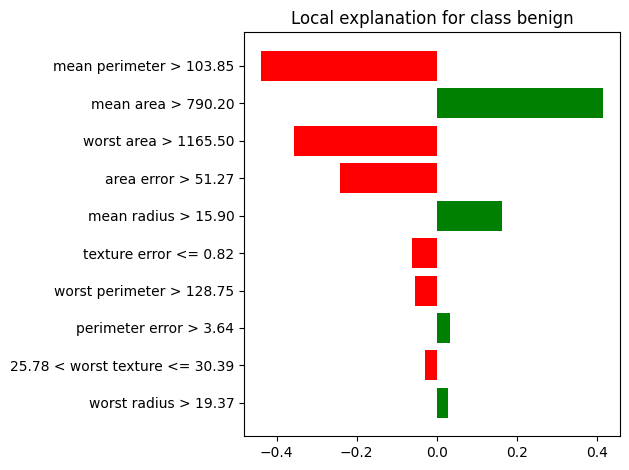

In [33]:
exp1 = explainer.explain_instance(X_test[1], logreg.predict_proba, num_features=10)

exp1.as_pyplot_figure()
plt.tight_layout()

**Commentaire :**
<br> Par rapport à la méthode précédente où l'on utilise l'impact d'une feature sur le modèle entier pour estimer son rôle joué sur la prédiction d'un exemple, avec LIME on a une mesure de l'importance de chaque feature évaluée localement, par rapport aux points qui l'entourent.<br> On peut voir cela par exemple à travers la feature 'mean perimeter' qui avait une influence positive sur la prédiction de l'exemple précédent et puis une influence négative sur la prédiction du second exemple.

## 4 - Expérimentations

<div class="alert alert-block alert-info">
    Faire des tests pour examiner le comportement de LIME. <br> De nombreuses études peuvent être menées (par exemple la stabilité de l'expliqueur, par rapport à des utilisations répétées ou par rapport aux données à expliquer, ou le rôle du classifieur, ou le type d'explications par rapport à des exemples contrefactuels, ou...). Précisez celle que vous choisissez et commentez les résultats obtenus.  
</div>

**Stabilité par rapport aux données**

Distance : 
 [[  0.    187.39  170.034 139.127 234.773]
 [187.39    0.    353.315  49.556  51.2  ]
 [170.034 353.315   0.    305.882 402.38 ]
 [139.127  49.556 305.882   0.     97.029]
 [234.773  51.2   402.38   97.029   0.   ]]
Cosine similarity :
 [[ 1.     0.927 -0.443  0.902  0.934]
 [ 0.927  1.    -0.405  0.905  0.964]
 [-0.443 -0.405  1.    -0.274 -0.294]
 [ 0.902  0.905 -0.274  1.     0.935]
 [ 0.934  0.964 -0.294  0.935  1.   ]]
D_expl = 1 - cos):
 [[ 0.     0.073  1.443  0.098  0.066]
 [ 0.073 -0.     1.405  0.095  0.036]
 [ 1.443  1.405  0.     1.274  1.294]
 [ 0.098  0.095  1.274  0.     0.065]
 [ 0.066  0.036  1.294  0.065  0.   ]]


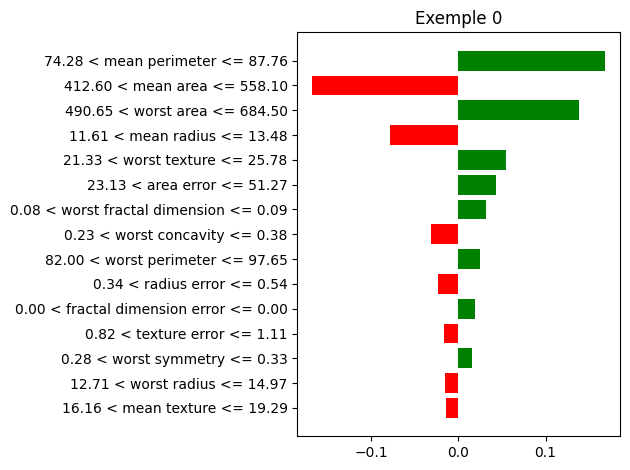

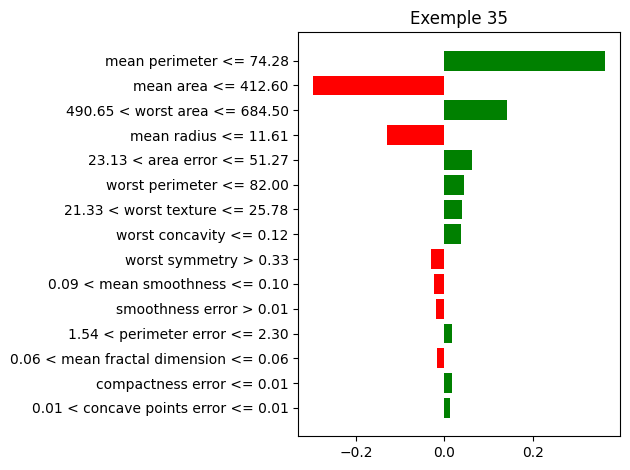

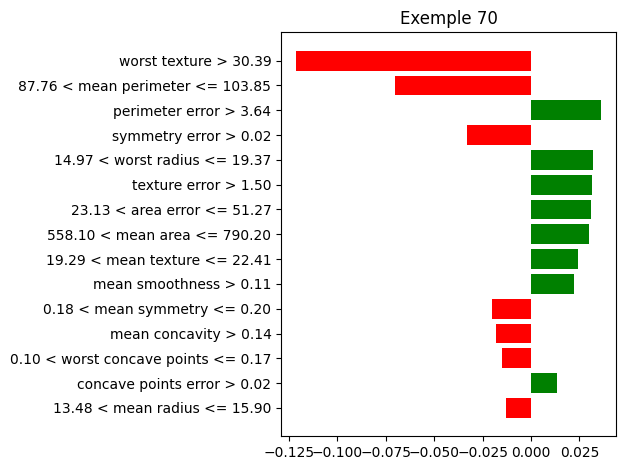

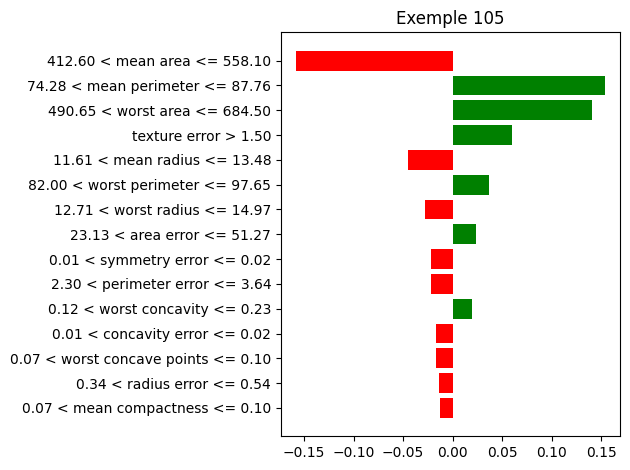

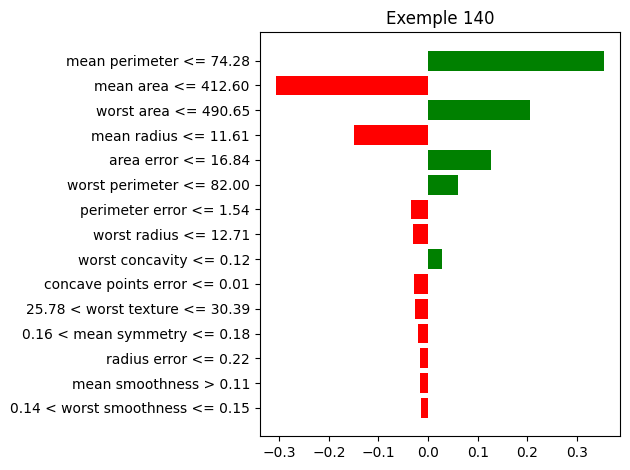

In [34]:
# par rapport aux données à expliquer
idx_exemples = range(0, X_test.shape[0]-1,int(X_test.shape[0]/4))
X_sel = X_test[idx_exemples]
W = []
for i in idx_exemples:
    exp = explainer.explain_instance(X_test[i], logreg.predict_proba,
                                     num_features=min(15, X_train.shape[1]),
                                     num_samples=5000)
    exp.as_pyplot_figure()
    plt.title(f"Exemple {i}", loc='center')
    plt.tight_layout()
    w_series = pd.Series(0.0, index=feature_names)
    for feat, val in exp.as_list():
        name = next((n for n in feature_names if n in feat), feat)
        if name in w_series.index:
            w_series[name] = val
    W.append(w_series.values)

W = np.vstack(W)
D_data = np.sqrt(((X_sel[:, None, :] - X_sel[None, :, :]) ** 2).sum(axis=2))
D_expl = 1 - cosine_similarity(W)

print("Distance : \n", np.round(D_data, 3))
print("Cosine similarity :\n", np.round(cosine_similarity(W), 3))
print("D_expl = 1 - cos):\n", np.round(D_expl, 3))

**Commentaire :**

Pour tester la stabilité on a commencer par tester la stabilité par rapport aux données à expliquer en variant dans different et espaces data samples. Pour verifier la varieté des données choisis on a calculé la distance entre eux, comme on peut voir les distances sont varies et significatifs. Les explication varie beaucoup en valeur par rapport aux different données mais les parametres le plus relevants continuent presque les mêmes.

**Stabilité par rapport à bruit**

0.9306791785111572 0.020505483968281783


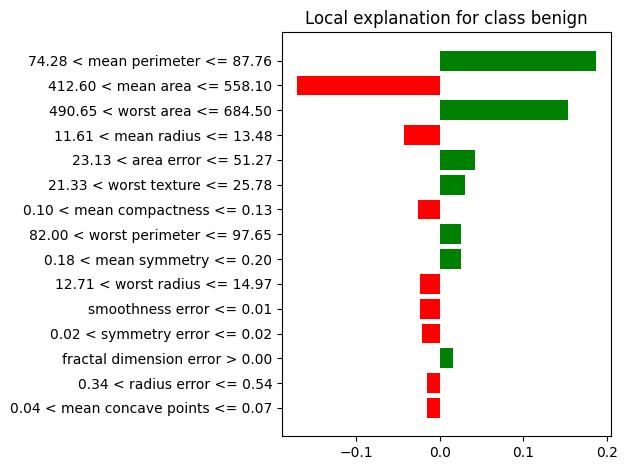

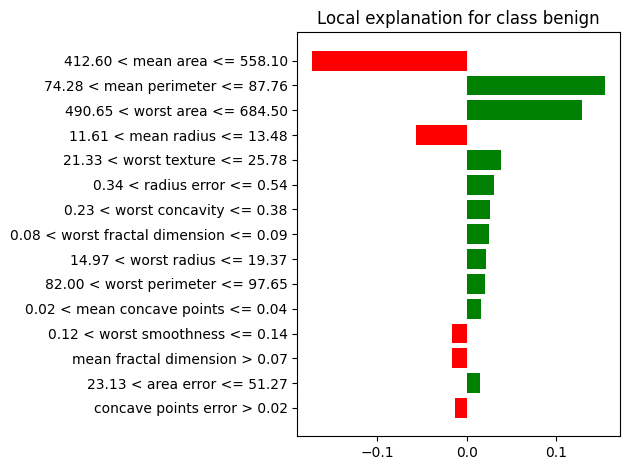

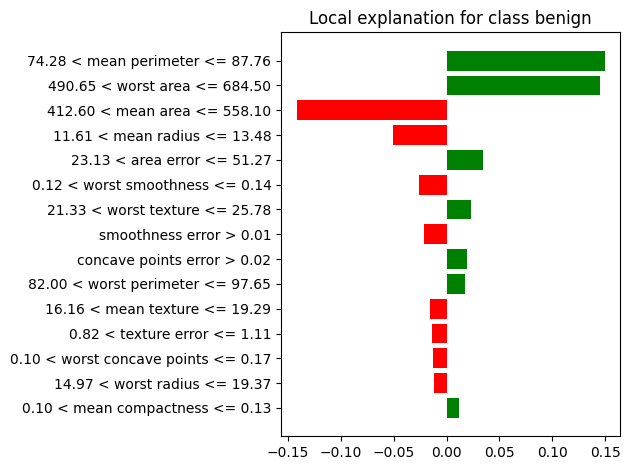

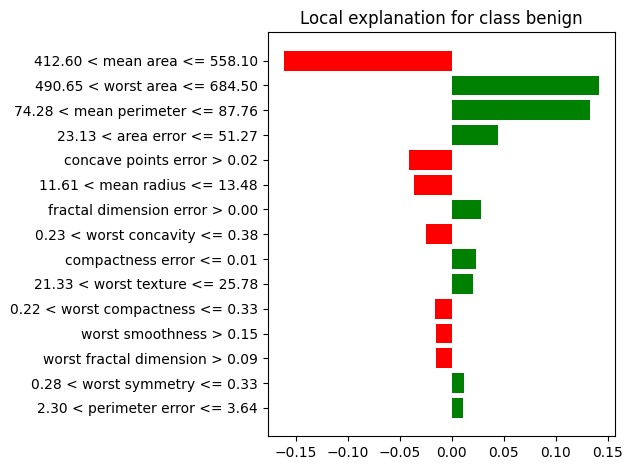

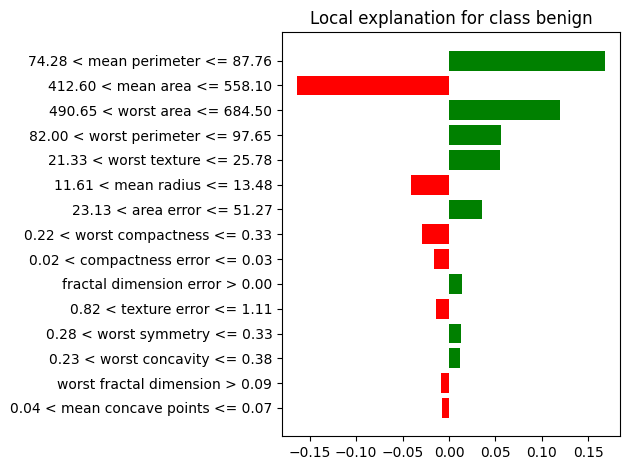

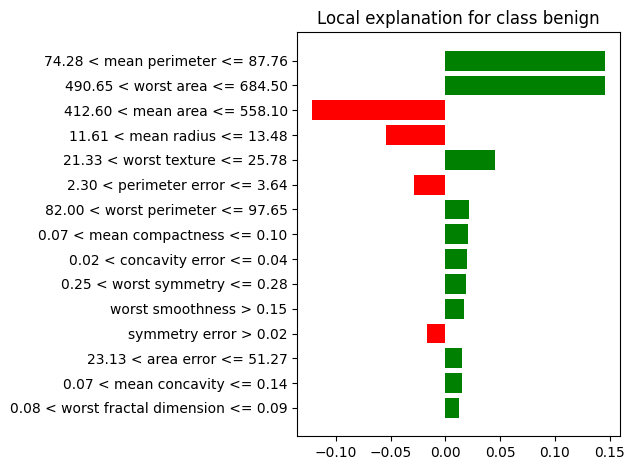

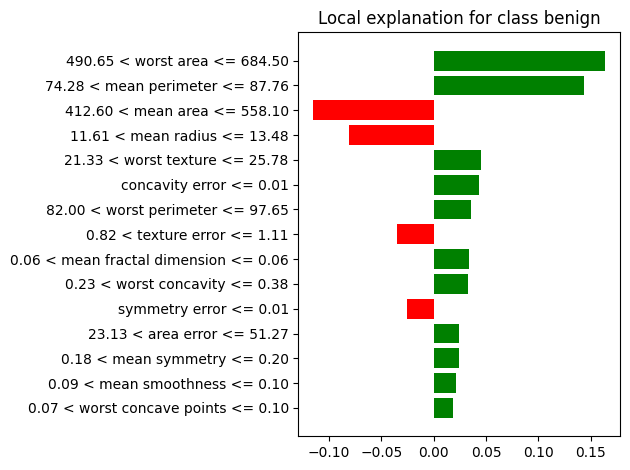

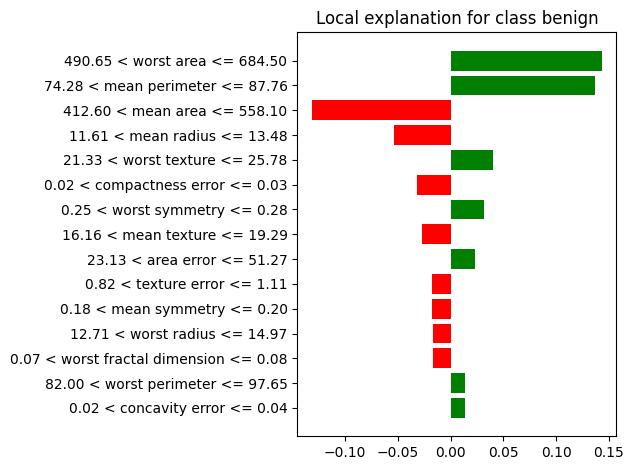

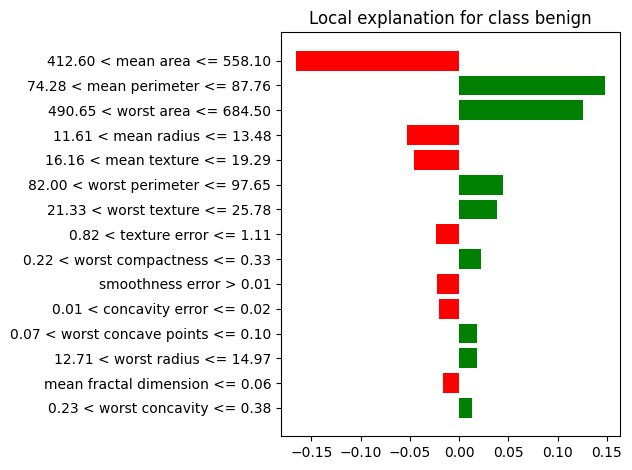

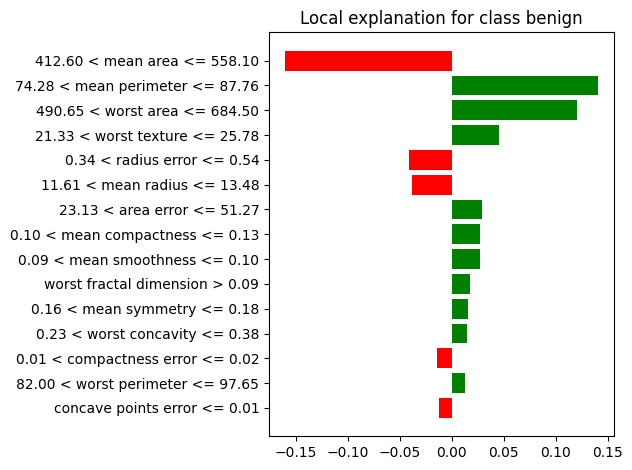

In [35]:
# Sensibilité à un bruit
rng = np.random.default_rng(0)
W_noisy = []
for _ in range(10):
    x_eps = X_test[0] + rng.normal(0, 0.01, size=X_test[0].shape)
    exp = explainer.explain_instance(
        x_eps, logreg.predict_proba,
        num_features=min(15, X_train.shape[1]),
        num_samples=5000
    )
    exp.as_pyplot_figure()
    plt.tight_layout()
    w_series = pd.Series(0.0, index=feature_names)
    for feat, val in exp.as_list():
        matches = [n for n in feature_names if n in feat]
        if len(matches) > 0:
            w_series[matches[0]] = val
    W_noisy.append(w_series.values)

W_noisy = np.vstack(W_noisy)
cos_noisy = []
for i in range(len(W_noisy)):
    for j in range(i+1, len(W_noisy)):
        cos_noisy.append(cosine_similarity(W_noisy[i:i+1], W_noisy[j:j+1])[0,0])

print(np.mean(cos_noisy), np.std(cos_noisy))

**Commentaire :**

Comme on peut constater, LIME a une sensibilité bas aux bruit. Cela fait du sense vu que il travail sur variations sur les données et le bruit peut functionnée comme ces petit variations.

**Stabilité par rapport au classifier**

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
# Classifier
rf = RandomForestClassifier(n_estimators=300, random_state=42).fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("confusion matrix Random Forest :\n",conf_matrix)
f1 = f1_score(y_test, y_pred_rf)
print("F1 : ",f1)

confusion matrix Random Forest :
 [[51  3]
 [ 2 87]]
F1 :  0.9720670391061452


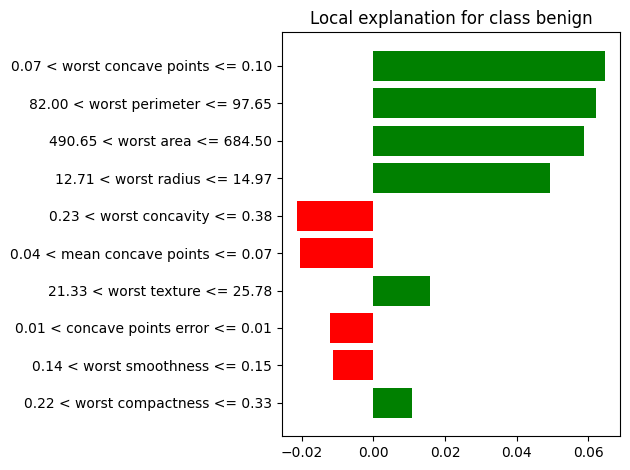

In [38]:
exp = explainer.explain_instance(X_test[0], rf.predict_proba, num_features=10)

exp.as_pyplot_figure()
plt.tight_layout()

**Commentaire :**

Avec le changement du classifier, les paramétre les plus important change consideablement d'ordre. Cela peut indiquer une unstabilité par rapport à la choix de classifier.

## 5 - Données textuelles

<div class="alert alert-block alert-warning">
    Nous allons apprendre un modèle de classification random forest sur les données <code>fetch_20newsgroups</code> puis utiliser LIME pour obtenir des explications sur la classification d'exemples.
</div>

<div class = "alert alert-block alert-info">
À l'aide de la <a href="https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html#sphx-glr-auto-examples-text-plot-document-classification-20newsgroups-py">documentation du dataset fetch_20newsgroups</a>,  apprendre un modèle random forest de classification bi-classe de texte.
</div>

In [39]:
from time import time
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

categories = [
    "alt.atheism",
    "sci.space",
]


def size_mb(docs):
    return sum(len(s.encode("utf-8")) for s in docs) / 1e6


def load_dataset(verbose=False, remove=()):
    """Load and vectorize the 20 newsgroups dataset."""

    data_train = fetch_20newsgroups(
        subset="train",
        categories=categories,
        shuffle=True,
        random_state=42,
        remove=remove,
    )

    data_test = fetch_20newsgroups(
        subset="test",
        categories=categories,
        shuffle=True,
        random_state=42,
        remove=remove,
    )

    # order of labels in `target_names` can be different from `categories`
    target_names = data_train.target_names

    # split target in a training set and a test set
    y_train, y_test = data_train.target, data_test.target

    # Extracting features from the training data using a sparse vectorizer
    t0 = time()
    vectorizer = TfidfVectorizer(
        sublinear_tf=True, max_df=0.5, min_df=5, stop_words="english"
    )
    X_train = vectorizer.fit_transform(data_train.data)
    duration_train = time() - t0

    # Extracting features from the test data using the same vectorizer
    t0 = time()
    X_test = vectorizer.transform(data_test.data)
    duration_test = time() - t0

    feature_names = vectorizer.get_feature_names_out()

    if verbose:
        # compute size of loaded data
        data_train_size_mb = size_mb(data_train.data)
        data_test_size_mb = size_mb(data_test.data)

        print(
            f"{len(data_train.data)} documents - "
            f"{data_train_size_mb:.2f}MB (training set)"
        )
        print(f"{len(data_test.data)} documents - {data_test_size_mb:.2f}MB (test set)")
        print(f"{len(target_names)} categories")
        print(
            f"vectorize training done in {duration_train:.3f}s "
            f"at {data_train_size_mb / duration_train:.3f}MB/s"
        )
        print(f"n_samples: {X_train.shape[0]}, n_features: {X_train.shape[1]}")
        print(
            f"vectorize testing done in {duration_test:.3f}s "
            f"at {data_test_size_mb / duration_test:.3f}MB/s"
        )
        print(f"n_samples: {X_test.shape[0]}, n_features: {X_test.shape[1]}")

    return X_train, X_test, y_train, y_test, feature_names, target_names

In [40]:
X_train, X_test, y_train, y_test, feature_names, target_names = load_dataset()

RFC = RandomForestClassifier(random_state=42)
RFC.fit(X_train, y_train)
target_names[RFC.predict(X_test[2])[0]]

'alt.atheism'

<div class = "alert alert-block alert-info">
Utilisez LIME pour obtenir des explications sur les prédictions obtenues sur des exemples.
    </div>

LIME output for test data: 
  129 54 55 ability accept activities admit argue argument arguments ask atheists attitude believe believed bible book choose christ christian christians church class com company consider creation daily dan death did die does don effort events eventually fact fi fools george given god great heart helped historical history honest host hundreds invisible jesus just know learn let life lived ll logic love major matter mean merely morality nasa neat nntp obviously oulu participate people phoenix pink prefer probably problems proof question rape read reality reason rely reply right say school simple simply sincerely suppose telling think tm told tried true trust try type uh ultimate virtual want wants washington way willing write wrote years


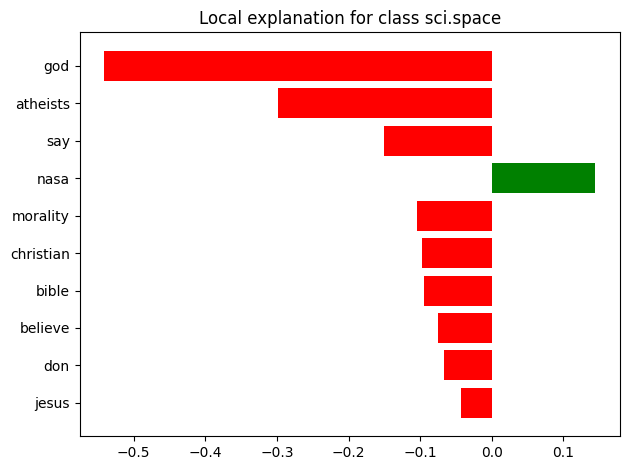

In [41]:
explainer = LimeTabularExplainer(X_test,
    feature_names=feature_names,
    class_names=target_names,
    categorical_features=[],
    mode='classification')

exp_words = explainer.explain_instance(X_test[2], RFC.predict_proba, num_features=10)

sentence = ""

col_indices = X_test[2].indices

for i in col_indices:
    sentence = sentence + " " + feature_names[i]

print("LIME output for test data: \n", sentence)
exp_words.as_pyplot_figure()
plt.tight_layout()

**Commentaires**
<br> On a deux classes possibles, religion et espace, et ce groupe de mots a été prédit dans la classe 'religion' <br>On peut clairement voir que le seul mot qui augment la probabilité d'attribuer à ce groupe de mots la classe espace est le mot 'nasa', alors que tous les autres mots qui impactent la prédiction finale sont liés à l'espace et ont donc un effet négatif sur la probabilité de la classe espace. <br> Cette figure permet donc bien d'expliquer la prédiction du modele puisqu'il montre clairement la dominance des mots religieux entre les mots qui ont influencer le score final.

## 6 - Implémentation de LIME

<div class="alert alert-block alert-info">
    Sur des données textuelles, implémentez une version rudimentaire de LIME en utilisant la fonction de proximité proposée dans le cours. Retrouvez-vous les mêmes vecteurs d'importance qu'avec la bibliothèque LIME ?
</div>

In [42]:
def proximity(x, z, sigma=0.75):
    D = np.sum(x != z) / len(x)
    return np.exp(-(D ** 2) / 2 * (sigma ** 2))

In [43]:
row = X_test[2]
nz_indices = row.indices
nz_values = row.data
num_words = len(nz_indices)
n_samples = 200

# creating perturbations of the input sentence to explain
Z = np.random.randint(0, 2, size=(n_samples, num_words))
# keep all words for the original example
Z[0, :] = 1
# Ensure Z is 2D
Z = Z.reshape(n_samples, num_words)

perturbed_vectors = []
for mask in Z:
    data = nz_values * mask
    indptr = [0, num_words]
    perturbed_vec = csr_matrix((data, nz_indices, indptr), shape=(1, X_test.shape[1]))
    perturbed_vectors.append(perturbed_vec)

perturbed_vectors = vstack(perturbed_vectors)


# train local model (Ridge because lime uses Ridge)
preds = RFC.predict_proba(perturbed_vectors)[:, 1]

weights = np.array([proximity(Z[0], z) for z in Z])

local_model = Ridge(alpha=1.0)
local_model.fit(Z, preds, sample_weight=weights)

importances = local_model.coef_
importances = np.ravel(importances)  # flatten just in case

words = [feature_names[i] for i in nz_indices]

for w, imp in zip(words, importances):
    print(w, " has an importance score of ", imp*100)

129  has an importance score of  0.04500738555438946
54  has an importance score of  -0.17913168961061113
55  has an importance score of  -0.6916449132061171
ability  has an importance score of  0.18512414384076425
accept  has an importance score of  -2.0565881243740742
activities  has an importance score of  -0.7894959674214546
admit  has an importance score of  -0.1338103041316316
argue  has an importance score of  -0.41184281459807315
argument  has an importance score of  -0.40983482571839824
arguments  has an importance score of  -1.0142492465411874
ask  has an importance score of  -0.06642752918163258
atheists  has an importance score of  -7.306263165640319
attitude  has an importance score of  0.9751381770392938
believe  has an importance score of  -4.106303551771144
believed  has an importance score of  1.127294553937604
bible  has an importance score of  -5.677883677027544
book  has an importance score of  -0.27948944294434225
choose  has an importance score of  0.4122630880663

**Commentaire:**
<br> Les scores sont multipliés par 100 pour faciliter l'interprétation comme toutes les valeures étaient inférieures à 0.01.
<br> On voit que le mot nasa a toujours le plus haut score (6.121969619371129).
<br> Les mots religieux comme jesus, morality, etc. ont toujours de hauts scores négatifs (-4.022211243402651, -4.802939848442233).